<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week11/multiclass_classification_in_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout

# Sci-kit learn
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split

In [40]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

In [41]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR_I2xiiboTvyDr5-Cvvo_m7tnoT2tVnzOWUYf2xBZEhTWiWtZOyerF3c2aQeym10S8T2yHnTPnlPi2/pub?output=csv'
df = pd.read_csv(url)
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [42]:
# Check for duplicates and missing values
print('Duplicates:', df.duplicated().sum())
print('Missing Values:', df.isna().sum().sum())

Duplicates: 0
Missing Values: 22


In [43]:
# Check the percentage of missing values.
print(float(df.isna().sum().sum()) / float(df.shape[0]))

0.13836477987421383


In [44]:
# 14% is a lot to drop, but we do so for this example
df.dropna(inplace = True)
df.isna().sum().sum()

0

In [45]:
# Check the balance of the target
df['Species'].value_counts(normalize = True)

Perch        0.345324
Bream        0.215827
Roach        0.115108
Pike         0.093525
Smelt        0.093525
Parkki       0.079137
Whitefish    0.043165
Beam         0.014388
Name: Species, dtype: float64

In [46]:
# A quick Google search shows there are no fish called beam
# so replace Beam with Bream
df.replace({'Beam': 'Bream'}, inplace = True)

In [47]:
# Check the balance again
df['Species'].value_counts(normalize = True)

Perch        0.345324
Bream        0.230216
Roach        0.115108
Pike         0.093525
Smelt        0.093525
Parkki       0.079137
Whitefish    0.043165
Name: Species, dtype: float64

In [48]:
# Set the target and features and split the data
X = df.drop(columns = 'Species')
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [49]:
# Scale the data
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [50]:
# Encode the labels
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

# Get the names of the classes for later use
classes = encoder.classes_

# Binarize the labels
binarizer = LabelBinarizer()
y_train_bin = binarizer.fit_transform(y_train_enc)
y_test_bin = binarizer.transform(y_test_enc)

# Check the results
print(y_train.head())
print(y_train_enc[:5])
print(y_train_bin[:5])

52     Roach
93     Perch
101    Perch
107    Perch
0      Bream
Name: Species, dtype: object
[4 2 2 2 0]
[[0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]]


In [51]:
# Create model architecture

# Define some parameters
input_dim = X_train_sc.shape[1]
num_classes = len(classes)

# Instantiate the model
model = Sequential()

# Add layers
model.add(Dense(50, input_dim = input_dim, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                350       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                 357       
                                                                 
Total params: 3,257
Trainable params: 3,257
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy',
                         metrics.Precision(),
                         metrics.Recall()])

In [53]:
# Fit the model
history = model.fit(X_train_sc, y_train_bin,
                    validation_data = (X_test_sc, y_test_bin),
                    epochs = 150,
                    verbose = 0)

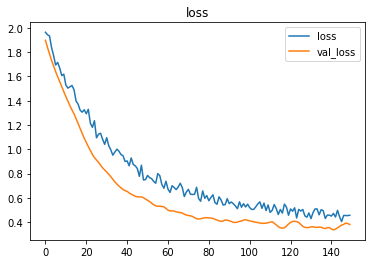

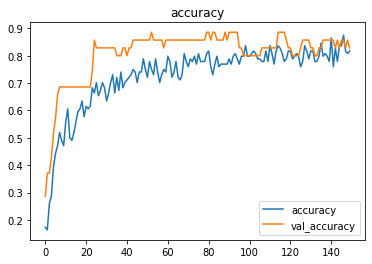

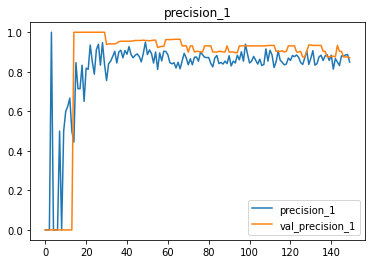

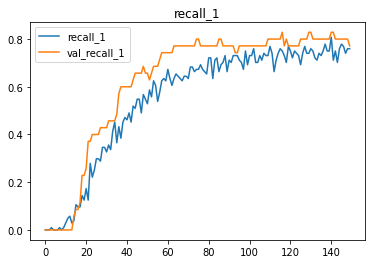

In [54]:
# Plot the learning history
plot_history(history)

In [57]:
# Get raw predictions
raw_pred = model.predict(X_test_sc)

# Display predictions and binarized true labels
print('Raw Predictions\n', raw_pred[:5])
print('\nBinarized y_test\n', y_test_bin[:5])

Raw Predictions
 [[5.7068555e-06 1.3100075e-03 2.3875071e-02 3.2101540e-05 4.3483727e-02
  9.3087709e-01 4.1634988e-04]
 [3.0505314e-04 1.3840706e-02 1.9164225e-01 2.8891340e-04 4.4873792e-01
  3.3758691e-01 7.5982157e-03]
 [9.9871683e-01 2.6066293e-04 1.6764849e-06 7.5241206e-07 4.5775370e-05
  9.2991463e-08 9.7430771e-04]
 [5.1662864e-06 1.9576827e-07 1.5135456e-04 9.9970120e-01 3.2128948e-05
  6.4768860e-06 1.0342107e-04]
 [5.0104395e-03 1.1252196e-02 4.5494199e-01 4.6285107e-03 4.5605567e-01
  2.4448195e-02 4.3662861e-02]]

Binarized y_test
 [[0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]]


In [63]:
# Convert predictions and labels into integers representing each fish class
y_pred = np.argmax(raw_pred, axis = 1)
y_true = np.argmax(y_test_bin, axis = 1)

print(y_pred)
print(y_true)

[5 4 0 3 4 0 2 4 5 1 2 5 4 0 2 2 0 0 5 6 4 3 2 0 2 0 5 1 0 0 0 1 2 5 2]
[5 2 0 3 4 0 6 2 5 1 2 5 2 0 2 2 0 0 5 2 4 3 2 0 2 0 5 1 0 0 0 1 2 2 2]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         3
           2       0.58      0.88      0.70         8
           3       1.00      1.00      1.00         2
           4       1.00      0.40      0.57         5
           5       1.00      0.83      0.91         6
           6       0.00      0.00      0.00         1

    accuracy                           0.83        35
   macro avg       0.80      0.73      0.74        35
weighted avg       0.88      0.83      0.83        35



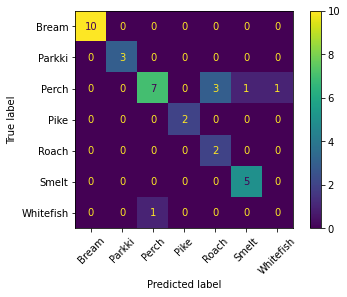

In [66]:
# Print classification report and confusion matirx
print(classification_report(y_pred, y_true))
ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                        display_labels = classes,
                                        xticks_rotation = 45)